In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

# Create Results Dataframe

In [7]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))
    
    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df

In [8]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,XGBoost,25920.433603,19914.833333,0.976293
1,RandomForest,19569.640279,16407.000000,0.986487
2,LSTM,18016.340729,15382.083333,0.988547
3,LinearRegression,16221.040791,12433.000000,0.990716
4,ARIMA,14959.893469,11265.335747,0.983564


# Plot Results

In [15]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(x=np.arange(len(results_df)), y='RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='mediumblue')
    sns.lineplot(x=np.arange(len(results_df)), y='MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)), rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel="Model", ylabel="Scores", title="Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'Data/compare_models.png')


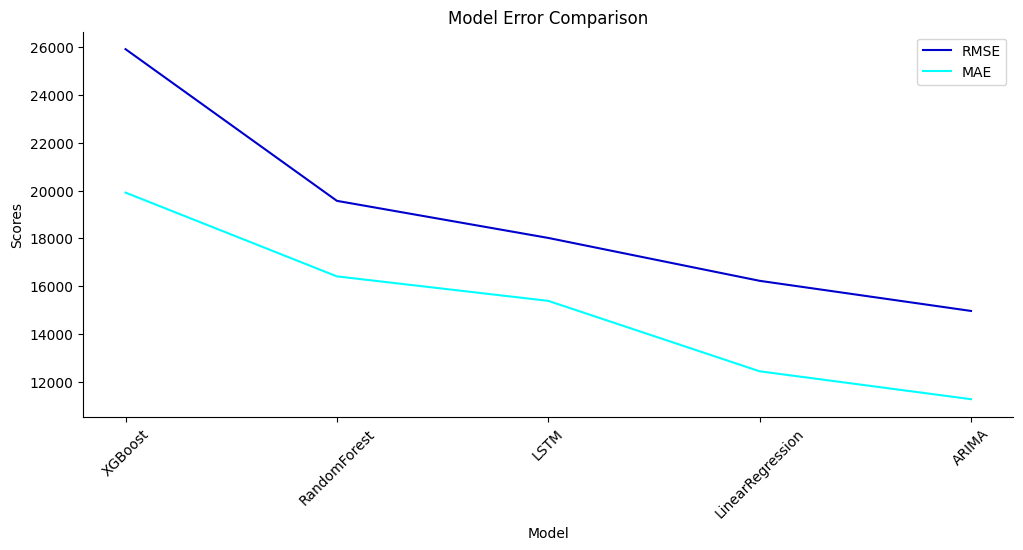

In [16]:
plot_results(results)

In [17]:
average_monthly_sales = 894478 #see eda notebook
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
